In [57]:
import re
import pandas as pd
import numpy as np
import joblib
import nltk

In [58]:
old = pd.read_csv('perbandingan/berita-24-5.csv')
# print(old)
new = pd.read_csv('perbandingan/berita-24-5.csv') # need changes
# print(new)

# print(new[new['qe_what']])

In [59]:
# old.columns
old.columns

Index(['ID', 'berita_title', 'berita_date', 'berita_qdate', 'berita_desc',
       'berita_source', 'created_at', 'berita_topik_id', 'qe_what', 'ner_when',
       'ner_who', 'ner_prov', 'ner_kab', 'ner_kec', 'ner_neg', 'sev_death',
       'sev_injury', 'sev_lost', 'sev_sink', 'sev_plane', 'sev_moneyUSD',
       'sev_moneyIDR', 'sev_persen', 'sev_inflasi', 'sev_internasional',
       'sev_nasional', 'sev_provkota', 'sev_lost_items', 'sev_lost_money',
       'sev_rape', 'sev_house', 'sev_person', 'class_classification',
       'berita_summary'],
      dtype='object')

# Comparing 4W

In [60]:
iter_through = [
    'bencana',
    'ekonomi', # permodalan, resmi, rasio, komoditas, perlambatan, percepatan, penguatan, kurs
    'kecelakaan',
    'kesehatan',
    'kriminalitas',
    'olahraga'
    ]

In [61]:
result = []
header = ['data_uji', 'old_what', 'new_what', 'improve_what']
fd = pd.DataFrame(columns=header)
for topik_id, n in enumerate(iter_through):
    val = []
    excel = pd.read_excel('D:/Repository/PetaKabar/what/'+ n +'/df_result_lda_evaluated.xlsx', index_col=0)
    val.append(len(excel))
    print(len(excel))
    tp = excel['tp_qe'].sum()
    tn = excel['tn_qe'].sum()
    val.append(tp/(tp+tn))
    # print(tp, tn)
    tp = excel['tp_lda'].sum()
    tn = excel['tn_lda'].sum()
    val.append(tp/(tp+tn))
    # print(tp, tn)
    # improvement
    val.append("{:.2%}".format((val[-1]-val[-2])/val[-2]))
    
    fd.loc[n] = val
fd

208
252
127
144


248
49


,data_uji,old_what,new_what,improve_what
bencana,208,0.990099,1.000000,1.00%
ekonomi,252,0.709677,1.000000,40.91%
kecelakaan,127,0.991736,0.991736,0.00%
kesehatan,144,0.920863,1.000000,8.59%
kriminalitas,248,0.903766,0.966527,6.94%
olahraga,49,0.702128,0.978723,39.39%


In [119]:
result = []
header = ['data_uji', 'old_what', 'new_what', 'improve_what', 'old_who', 'new_who', 'improve_who','old_when', 'new_when', 'improve_when', 'old_where', 'new_where', 'improve_where']
fd = pd.DataFrame(columns=header)
total_tp_what_o = 0
total_tn_what_o = 0
total_tp_what_n = 0
total_tn_what_n = 0
total_tp_where_o = 0
total_tn_where_o = 0
total_tp_where_n = 0
total_tn_where_n = 0
total_tp_who_o = 0
total_tn_who_o = 0
total_tp_who_n = 0
total_tn_who_n = 0
total_tp_when_o = 0
total_tn_when_o = 0
total_tp_when_n = 0
total_tn_when_n = 0

for topik_id, n in enumerate(iter_through):
    val = []
    excel = pd.read_excel('D:/Repository/PetaKabar/whowherewhen/whowhenwhere_test_result_' + n +'_evaluated.xlsx', index_col=0)
    excel_what = pd.read_excel('D:/Repository/PetaKabar/what/'+ n +'/df_result_lda_evaluated.xlsx', index_col=0)
    val.append(len(excel))
    print(len(excel))
    tp = excel_what['tp_qe'].sum()
    tn = excel_what['tn_qe'].sum()
    total_tp_what_o += tp
    total_tn_what_o += tn
    val.append(tp/(tp+tn))
    # print(tp, tn)
    tp = excel_what['tp_lda'].sum()
    tn = excel_what['tn_lda'].sum()
    val.append(tp/(tp+tn))
    total_tp_what_n += tp
    total_tn_what_n += tn
    # print(tp, tn)
    # improvement
    val.append("{:.2%}".format((val[-1]-val[-2])/val[-2]))
    tp = excel['tp_who_o'].sum()
    tn = excel['tn_who_o'].sum()
    val.append(tp/(tp+tn))
    total_tp_who_o += tp
    total_tn_who_o += tn
    # print(tp, tn)
    tp = excel['tp_who_n'].sum()
    tn = excel['tn_who_n'].sum()
    val.append(tp/(tp+tn))
    total_tp_who_n += tp
    total_tn_who_n += tn
    # print(tp, tn)
    # improvement
    val.append("{:.2%}".format((val[-1]-val[-2])/val[-2]))
    tp = excel['tp_when_o'].sum()
    tn = excel['tn_when_o'].sum()
    val.append(tp/(tp+tn))
    total_tp_when_o += tp
    total_tn_when_o += tn
    # print(tp, tn)
    tp = excel['tp_when_n'].sum()
    tn = excel['tn_when_n'].sum()
    val.append(tp/(tp+tn))
    total_tp_when_n += tp
    total_tn_when_n += tn
    # print(tp, tn)
    # improvement
    val.append("{:.2%}".format((val[-1]-val[-2])/val[-2]))
    tp = excel['tp_where_o'].sum()
    tn = excel['tn_where_o'].sum()
    val.append(tp/(tp+tn))
    total_tp_where_o += tp
    total_tn_where_o += tn
    # print(tp, tn)
    tp = excel['tp_where_n'].sum()
    tn = excel['tn_where_n'].sum()
    val.append(tp/(tp+tn))
    total_tp_where_n += tp
    total_tn_where_n += tn
    # print(tp, tn)
    # improvement
    val.append("{:.2%}".format((val[-1]-val[-2])/val[-2]))
    print(val)
    # df = pd.DataFrame([val], columns=header)
    # print(df)
    fd.loc[n] = val
    if total_tn_what_n + total_tp_what_n != total_tp_what_o + total_tn_what_o:
        print("cek what", n)
    if total_tn_who_n + total_tp_who_n != total_tp_who_o + total_tn_who_o:
        print("cek who", n)
    if total_tn_when_n + total_tp_when_n != total_tp_when_o + total_tn_when_o:
        print("cek when", n)
    if total_tn_where_n + total_tp_where_n != total_tp_where_o + total_tn_where_o:
        print("cek where", n)
fd.to_excel('D:/Repository/PetaKabar/perbandingan/4w_comparison_newest.xlsx')
print("tp what old", total_tp_what_o)
print("tn what old", total_tn_what_o)
print("tp what new", total_tp_what_n)
print("tn what new", total_tn_what_n)
print("tp who old", total_tp_who_o)
print("tn who old", total_tn_who_o)
print("tp who new", total_tp_who_n)
print("tn who new", total_tn_who_n)
print("tp where old", total_tp_where_o)
print("tn where old", total_tn_where_o)
print("tp where new", total_tp_where_n)
print("tn where new", total_tn_where_n)
print("tp when old", total_tp_when_o)
print("tn when old", total_tn_when_o)
print("tp when new", total_tp_when_n)
print("tn when new", total_tn_when_n)
fd


208
[208, 0.9900990099009901, 1.0, '1.00%', 0.671957671957672, 1.0, '48.82%', 0.9850746268656716, 1.0, '1.52%', 0.945273631840796, 0.9751243781094527, '3.16%']
252
[252, 0.7096774193548387, 1.0, '40.91%', 0.7297297297297297, 0.990990990990991, '35.80%', 0.9626168224299065, 1.0, '3.88%', 0.9230769230769231, 0.9538461538461539, '3.33%']
127
[127, 0.9917355371900827, 0.9917355371900827, '0.00%', 0.7886178861788617, 0.983739837398374, '24.74%', 1.0, 1.0, '0.00%', 0.9067796610169492, 0.9830508474576272, '8.41%']
144
[144, 0.920863309352518, 1.0, '8.59%', 0.6545454545454545, 0.9636363636363636, '47.22%', 0.9649122807017544, 1.0, '3.64%', 0.8409090909090909, 0.9431818181818182, '12.16%']
248
[248, 0.9037656903765691, 0.9665271966527197, '6.94%', 0.8008130081300813, 1.0, '24.87%', 0.9835390946502057, 1.0, '1.67%', 0.9388646288209607, 0.9912663755458515, '5.58%']
49
[49, 0.7021276595744681, 0.9787234042553191, '39.39%', 0.625, 0.9791666666666666, '56.67%', 0.9318181818181818, 0.9772727272727273

,data_uji,old_what,new_what,improve_what,old_who,new_who,improve_who,old_when,new_when,improve_when,old_where,new_where,improve_where
bencana,208,0.990099,1.000000,1.00%,0.671958,1.000000,48.82%,0.985075,1.000000,1.52%,0.945274,0.975124,3.16%
ekonomi,252,0.709677,1.000000,40.91%,0.729730,0.990991,35.80%,0.962617,1.000000,3.88%,0.923077,0.953846,3.33%
kecelakaan,127,0.991736,0.991736,0.00%,0.788618,0.983740,24.74%,1.000000,1.000000,0.00%,0.906780,0.983051,8.41%
kesehatan,144,0.920863,1.000000,8.59%,0.654545,0.963636,47.22%,0.964912,1.000000,3.64%,0.840909,0.943182,12.16%
kriminalitas,248,0.903766,0.966527,6.94%,0.800813,1.000000,24.87%,0.983539,1.000000,1.67%,0.938865,0.991266,5.58%
olahraga,49,0.702128,0.978723,39.39%,0.625000,0.979167,56.67%,0.931818,0.977273,4.88%,0.500000,1.000000,100.00%


# Comparing Classification 

In [63]:
# Create model
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Check accuracy score
from sklearn.metrics import accuracy_score

# Applying 10-Fold Cross Validation
from sklearn.model_selection import cross_val_score

from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder

from nltk import word_tokenize

import csv

result_path = "D://PetaKabar/perbandingan/classification_comparison_v5.csv"

In [64]:
res_cls = open(result_path, 'w', encoding='UTF8')
res_writer = csv.writer(res_cls)
res_writer.writerow(['topik', 'model','model-acs', 'cross-val','f1'])
res_cls.close()

In [65]:
def compare_cls(X_train, X_test, y_train, y_test, mode="Default", topik="none"):
    if mode == 'olahraga':
        cfm = ['internasional','nasional','provkota']
    else:
        cfm = ['rendah','sedang','parah']
    
    res_cls = open(result_path, 'a', encoding='UTF8', newline='')
    res_writer = csv.writer(res_cls)

    ## Instantiate the model
    gnb = GaussianNB()
    rf = RandomForestClassifier()
    logreg = LogisticRegression(max_iter=3000, solver='lbfgs')
    d_tree = DecisionTreeClassifier()
    svc=SVC() 
    knn = KNeighborsClassifier() # default nilai k = 5
    dl = MLPClassifier(solver='lbfgs', max_iter=5000)

    scaler = StandardScaler()

    X_train_ss = scaler.fit_transform(X_train)
    X_test_ss = scaler.transform(X_test)

    X_train_le = X_train[X_train.columns.values.tolist()].apply(LabelEncoder().fit_transform)
    # X_test_le = X_train[X_train.columns.values.tolist()].apply(LabelEncoder().fit_transform)

    ## Fit the model
    gnb.fit(X_train, y_train)
    rf.fit(X_train,y_train)
    logreg.fit(X_train_le, y_train)
    d_tree.fit(X_train, y_train)
    svc.fit(X_train_ss,y_train)
    knn.fit(X_train, y_train)
    dl.fit(X_train_ss, y_train)

    # joblib.dump(gnb, "D:/Repository/PetaKabar/models/gnb_klasifikasi_" + topik + ".pkl")
    # joblib.dump(rf, "D:/Repository/PetaKabar/models/rf_klasifikasi_" + topik + ".pkl")
    # joblib.dump(logreg, "D:/Repository/PetaKabar/models/logreg_klasifikasi_" + topik + ".pkl")
    # joblib.dump(d_tree, "D:/Repository/PetaKabar/models/d_tree_klasifikasi_" + topik + ".pkl")
    # joblib.dump(svc, "D:/Repository/PetaKabar/models/svc_klasifikasi_" + topik + ".pkl")
    # joblib.dump(knn, "D:/Repository/PetaKabar/models/knn_klasifikasi_" + topik + ".pkl")
    # joblib.dump(dl, "D:/Repository/PetaKabar/models/dl_klasifikasi_" + topik + ".pkl")

    y_pred_gnb = gnb.predict(X_test)
    y_pred_rf = rf.predict(X_test)
    y_pred_logreg = logreg.predict(X_test)
    y_pred_d_tree = d_tree.predict(X_test)
    y_pred_svc = svc.predict(X_test_ss)
    y_pred_knn = knn.predict(X_test)
    y_pred_dl = dl.predict(X_test_ss)

    print('Model accuracy score')
    print('Naive Bayes : {0:0.4f}'.format(accuracy_score(y_test, y_pred_gnb)))
    print('Random Forest : {0:0.4f}'.format(accuracy_score(y_test, y_pred_rf)))
    print('Logistic Regression : {0:0.4f}'.format(accuracy_score(y_test, y_pred_logreg)))
    print('Decision Tree : {0:0.4f}'.format(accuracy_score(y_test, y_pred_d_tree)))
    print('SVM : {0:0.4f}'.format(accuracy_score(y_test, y_pred_svc)))
    print('KNearestNeighbors : {0:0.4f}'.format(accuracy_score(y_test, y_pred_knn)))
    print('Deep Learning (MLP) : {0:0.4f}'.format(accuracy_score(y_test, y_pred_dl)))

    scores_gnb = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')
    scores_rf = cross_val_score(rf, X_train, y_train, cv = 10, scoring='accuracy')
    scores_logreg = cross_val_score(logreg, X_train_le, y_train, cv = 10, scoring='accuracy')
    scores_d_tree = cross_val_score(d_tree, X_train, y_train, cv = 10, scoring='accuracy')
    scores_svc = cross_val_score(svc, X_train_ss, y_train, cv = 10, scoring='accuracy')
    scores_knn = cross_val_score(knn, X_train, y_train, cv = 10, scoring='accuracy')
    scores_dl = cross_val_score(dl, X_train_ss, y_train, cv = 10, scoring='accuracy')

    # print('Cross-validation scores:{}'.format(scores))

    print('\nAverage cross-validation score')
    print('Naive Bayes: {:.4f}'.format(scores_gnb.mean()))
    print('Random Forest: {:.4f}'.format(scores_rf.mean()))
    print('Logistic Regression: {:.4f}'.format(scores_logreg.mean()))
    print('Decision Tree: {:.4f}'.format(scores_d_tree.mean()))
    print('SVM: {:.4f}'.format(scores_svc.mean()))
    print('KNearestNeighbors: {:.4f}'.format(scores_knn.mean()))
    print('Deep Learning (MLP): {:.4f}'.format(scores_dl.mean()))

    # print('\nTraining set score: {:.4f}'.format(rf.score(X_train, y_train)))
    # print('Test set score: {:.4f}'.format(rf.score(X_test, y_test)))

    print('\nf1 score')
    print('Naive Bayes: {:.4f}'.format(f1_score(y_test, y_pred_gnb, average='weighted')))
    print('Random Forest: {:.4f}'.format(f1_score(y_test, y_pred_rf, average='weighted')))
    print('Logistic Regression: {:.4f}'.format(f1_score(y_test, y_pred_logreg, average='weighted')))
    print('Decision Tree: {:.4f}'.format(f1_score(y_test, y_pred_d_tree, average='weighted')))
    print('SVM: {:.4f}'.format(f1_score(y_test, y_pred_svc, average='weighted')))
    print('KNearestNeighbors: {:.4f}'.format(f1_score(y_test, y_pred_knn, average='weighted')))
    print('Deep Learning (MLP): {:.4f}\n'.format(f1_score(y_test, y_pred_dl, average='weighted')))

    # print(classification_report(y_test, y_pred, target_names=['rendah', 'sedang']))
    print(classification_report(y_test, y_pred_rf, target_names=['rendah', 'sedang', 'parah']))

    cm=confusion_matrix(y_test,y_pred_rf)
    cm_df = pd.DataFrame(cm,
                        index = cfm, 
                        columns = cfm)
    plt.figure(figsize=(6,3))
    plt.title("Confusion Matrix Random Forest")
    sns.heatmap(cm_df, annot=True,fmt='d', cmap='Blues')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    # plt.savefig('confusion_matrix.png')

    model = "Naive Bayes"
    res_writer.writerow([topik, model, accuracy_score(y_test, y_pred_gnb), scores_gnb.mean(), f1_score(y_test, y_pred_gnb, average='weighted')])
    model = "Random Forest"
    res_writer.writerow([topik, model, accuracy_score(y_test, y_pred_rf), scores_rf.mean(), f1_score(y_test, y_pred_rf, average='weighted')])
    model = "Logistic Regression"
    res_writer.writerow([topik, model, accuracy_score(y_test, y_pred_logreg), scores_logreg.mean(), f1_score(y_test, y_pred_logreg, average='weighted')])
    model = "Decision Tree"
    res_writer.writerow([topik, model, accuracy_score(y_test, y_pred_d_tree), scores_d_tree.mean(), f1_score(y_test, y_pred_d_tree, average='weighted')])
    model = "SVM"
    res_writer.writerow([topik, model, accuracy_score(y_test, y_pred_svc), scores_svc.mean(), f1_score(y_test, y_pred_svc, average='weighted')])
    model = "KNearestNeighbors"
    res_writer.writerow([topik, model, accuracy_score(y_test, y_pred_knn), scores_knn.mean(), f1_score(y_test, y_pred_knn, average='weighted')])
    model = "Deep Learning(MLP)"
    res_writer.writerow([topik, model, accuracy_score(y_test, y_pred_dl), scores_dl.mean(), f1_score(y_test, y_pred_dl, average='weighted')])
    res_cls.close()

    df = X_test
    df['nb'] = y_pred_gnb
    df['rf'] = y_pred_rf
    df['lr'] = y_pred_logreg
    df['dt'] = y_pred_d_tree
    df['svm'] = y_pred_svc
    df['knn'] = y_pred_knn
    df['mlp'] = y_pred_dl
    df['actual'] = y_test

    print(df.head(7))

    df.to_excel("D:/Repository/PetaKabar/perbandingan/sampel_klasifikasi_" + topik + ".xlsx")

In [66]:
cls_old = old[['ID', 'berita_title', 'berita_topik_id', 'berita_desc', 'sev_death', \
       'sev_injury', 'sev_lost', 'sev_sink', 'sev_plane', 'sev_moneyUSD', \
       'sev_moneyIDR', 'sev_persen', 'sev_inflasi', 'sev_internasional', \
       'sev_nasional', 'sev_provkota', 'sev_lost_items', 'sev_lost_money', \
       'sev_rape', 'sev_house', 'sev_person', 'class_classification']]

In [67]:
cls_old.head(1)

,ID,berita_title,berita_topik_id,berita_desc,sev_death,sev_injury,sev_lost,sev_sink,sev_plane,sev_moneyUSD,...,sev_inflasi,sev_internasional,sev_nasional,sev_provkota,sev_lost_items,sev_lost_money,sev_rape,sev_house,sev_person,class_classification
0,1,Bagaimana Proses Terjadinya Gempa Bumi?,1,"\- Saat gempa bumi terjadi, tanah dan apa saja...",0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,sedang


## Bencana

### Preprocess

In [68]:
# Bencana Section (Topic id = 1)
cls_old_bencana = cls_old[cls_old['berita_topik_id'] == 1]
cls_old_bencana = cls_old_bencana[['sev_death', 'sev_injury', 'sev_house', 'sev_person']]
# print(len(cls_old_bencana))
cls_old_bencana.rename(columns = {'sev_death':'mati', 'sev_injury':'luka', 'sev_house':'rumah', 'sev_person':'orang'}, inplace=True)
cls_old_bencana.dtypes

mati     float64
luka     float64
rumah    float64
orang    float64
dtype: object

In [69]:
# cls_old_bencana['mati'] = [re.sub("[^0-9]", "", str(mati)) if (re.sub("[^0-9]", "", str(mati)) != '') else 1 for mati in cls_old_bencana['mati']]
cls_old_bencana['mati'] = cls_old_bencana['mati'].astype(int)

# cls_old_bencana['luka'] = [re.sub("[^0-9]", "", str(luka)) if (re.sub("[^0-9]", "", str(luka)) != '') else 1 for luka in cls_old_bencana['luka']]
cls_old_bencana['luka'] = cls_old_bencana['luka'].astype(int)

# cls_old_bencana['rumah'] = [re.sub("[^0-9]", "", str(rumah)) if (re.sub("[^0-9]", "", str(rumah)) != '') else 1 for rumah in cls_old_bencana['rumah']]
cls_old_bencana['rumah'] = cls_old_bencana['rumah'].astype(int)

# cls_old_bencana['orang'] = [re.sub("[^0-9]", "", str(orang)) if (re.sub("[^0-9]", "", str(orang)) != '') else 1 for orang in cls_old_bencana['orang']]
cls_old_bencana['orang'] = cls_old_bencana['orang'].astype(int)
# cls_old_bencana = cls_old_bencana.replace({',': '.'}, regex=True)

cls_old_bencana.head()

,mati,luka,rumah,orang
0,0,0,0,0
1,0,0,5,0
2,1,7729,1,318
3,0,1,0,1
4,0,0,25,230


### Input Severity

In [70]:
# naive_bayes_new.ipynb
def matiScale(matiCount: int) -> int:
  if matiCount < 3:
    return 1
  elif matiCount >= 3 and matiCount < 15:
    return 2
  return 3

def lukaScale(lukaCount: int) -> int:
  if lukaCount < 10:
    return 1
  elif lukaCount >= 10 and lukaCount < 20:
    return 2
  return 3

def rumahScale(rumahCount: int) -> int:
  if rumahCount < 4:
    return 1
  elif rumahCount >= 4 and rumahCount <= 20:
    return 2
  return 3

def orangScale(orangCount: int) -> int:
  if orangCount < 10:
    return 1
  elif orangCount >= 10 and orangCount <= 100:
    return 2
  return 3

def calculate(mati: int, luka: int, rumah: int, orang: int):
  subtractor = 0
  total = 0
  fiturCount = 4

  if (mati > 0):
    total += matiScale(matiCount=mati)
  else:
    subtractor += 1

  if (luka > 0):
    total += lukaScale(lukaCount=luka)
  else:
    subtractor += 1

  if (rumah > 0):
    total += rumahScale(rumahCount=rumah)
  else:
    subtractor += 1
  
  if (orang > 0):
    total += orangScale(orangCount=orang)
  else:
    subtractor += 1
          

  divider = (fiturCount - subtractor)
  severityMean = 0

  if (divider > 0):
    severityMean = total / divider

  if severityMean <= 1:
    return 1
  elif severityMean > 1 and severityMean <= 2:
    return 2
  else:
    return 3

In [71]:
keparahanValues = []

for index, row in cls_old_bencana.iterrows():
  result = calculate(orang=int(row['orang']), \
      luka=int(row['luka']), \
        rumah=int(row['rumah']), \
          mati=int(row['mati']))
  
  keparahanValues.append(result)

In [72]:
cls_old_bencana['keparahannew'] = keparahanValues
cls_old_bencana.head()

,mati,luka,rumah,orang,keparahannew
0,0,0,0,0,1
1,0,0,5,0,2
2,1,7729,1,318,2
3,0,1,0,1,1
4,0,0,25,230,3


### Fit & Train

In [73]:
# Declare feature vector and target variable
X = cls_old_bencana.drop(['keparahannew'], axis=1)
y = cls_old_bencana['keparahannew']
X.describe()

,mati,luka,rumah,orang
count,2.773000e+03,2773.000000,2773.000000,2.773000e+03
mean,3.975754e+04,29.438154,1266.150379,2.666879e+04
std,2.088903e+06,457.328387,27543.185997,9.477396e+05
min,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,0.000000e+00,0.000000,0.000000,0.000000e+00
75%,0.000000e+00,0.000000,1.000000,1.000000e+00
max,1.100000e+08,8724.000000,1000000.000000,4.400000e+07


In [74]:
# Split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(len(X_train))
print(len(X_test))
print(X_train.shape, X_test.shape)

2218
555
(2218, 4) (555, 4)


In [75]:
X_train

,mati,luka,rumah,orang
1313,0,1,1,0
9069,0,0,1,0
9688,0,0,0,1
330,0,0,0,1
757,0,0,0,0
...,...,...,...,...
763,0,0,0,0
835,1,0,0,1
1653,1,0,1,1
9725,0,0,0,0


Model accuracy score
Naive Bayes : 0.8288
Random Forest : 0.9946
Logistic Regression : 0.9441
Decision Tree : 0.9910
SVM : 0.8108
KNearestNeighbors : 0.9658
Deep Learning (MLP) : 0.9315

Average cross-validation score
Naive Bayes: 0.8107
Random Forest: 0.9901
Logistic Regression: 0.9463
Decision Tree: 0.9851
SVM: 0.7971
KNearestNeighbors: 0.9522
Deep Learning (MLP): 0.8467

f1 score
Naive Bayes: 0.7799
Random Forest: 0.9946
Logistic Regression: 0.9439
Decision Tree: 0.9910
SVM: 0.7332
KNearestNeighbors: 0.9659
Deep Learning (MLP): 0.9267

              precision    recall  f1-score   support

      rendah       1.00      1.00      1.00       445
      sedang       0.97      0.99      0.98        76
       parah       0.97      0.94      0.96        34

    accuracy                           0.99       555
   macro avg       0.98      0.98      0.98       555
weighted avg       0.99      0.99      0.99       555

      mati  luka  rumah  orang  nb  rf  lr  dt  svm  knn  mlp  actual
9837

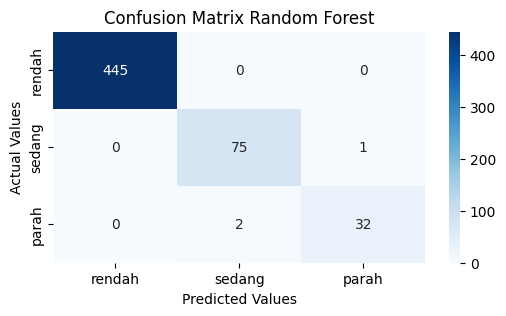

In [76]:
compare_cls(X_train, X_test, y_train, y_test, topik="bencana")

## Ekonomi

### Preprocess

In [77]:
# Ekonomi Section (Topic id = 2)
cls_old_ekonomi = cls_old[cls_old['berita_topik_id'] == 2]
cls_old_ekonomi = cls_old_ekonomi[['sev_moneyUSD', 'sev_moneyIDR', 'sev_persen', 'sev_inflasi']]
print(len(cls_old_ekonomi))
cls_old_ekonomi.rename(columns = {'sev_moneyUSD':'USD', 'sev_moneyIDR':'IDR', 'sev_persen':'persen', 'sev_inflasi':'inflasi'}, inplace=True)
cls_old_ekonomi.dtypes

3141


USD        float64
IDR        float64
persen     float64
inflasi    float64
dtype: object

In [78]:
# cls_old_ekonomi['mati'] = [re.sub("[^0-9]", "", str(mati)) if (re.sub("[^0-9]", "", str(mati)) != '') else 1 for mati in cls_old_ekonomi['mati']]
cls_old_ekonomi['USD'] = cls_old_ekonomi['USD'].astype(int)

# cls_old_ekonomi['luka'] = [re.sub("[^0-9]", "", str(luka)) if (re.sub("[^0-9]", "", str(luka)) != '') else 1 for luka in cls_old_ekonomi['luka']]
cls_old_ekonomi['IDR'] = cls_old_ekonomi['IDR'].astype(int)

# cls_old_ekonomi['rumah'] = [re.sub("[^0-9]", "", str(rumah)) if (re.sub("[^0-9]", "", str(rumah)) != '') else 1 for rumah in cls_old_ekonomi['rumah']]
# cls_old_ekonomi['rumah'] = cls_old_ekonomi['rumah'].astype(int)

# cls_old_ekonomi['orang'] = [re.sub("[^0-9]", "", str(orang)) if (re.sub("[^0-9]", "", str(orang)) != '') else 1 for orang in cls_old_ekonomi['orang']]
cls_old_ekonomi['inflasi'] = cls_old_ekonomi['inflasi'].astype(int)
# cls_old_ekonomi = cls_old_ekonomi.replace({',': '.'}, regex=True)

cls_old_ekonomi.head()

,USD,IDR,persen,inflasi
2005,0,0,0.0,0
2006,0,0,1.0,0
2007,0,2500000,0.0,0
2008,0,100,60.0,0
2009,0,0,0.0,0


### Input Severity

In [79]:
# klasifikasi.ipynb ekonomi
def calc_eko(df):
  # Kondisi Gabungan 
  keparahanValues = []
  for i in range (0,len(df)):

    USD=df.iloc[i,0]
    IDR=df.iloc[i,1]
    persen=df.iloc[i,2]
    inflasi=df.iloc[i,3]
    # print(USD)

    # USD
    if(USD==0 or USD<=100000000 ):
      keparahanUSD=1
    
    elif(USD>100000000 or USD<=1000000000 ):
      keparahanUSD=2
    
    elif(USD>100000000 ):
      keparahanUSD=3
    
    # IDR
    if(IDR==0 or IDR<=100000000 ):
      keparahanIDR=1
    
    elif(IDR>100000000 or IDR<=1000000000 ):
      keparahanIDR=2
    
    elif(IDR>1000000000 ):
      keparahanIDR=3
    
    # PERSEN
    if(persen==0 or persen<=5 ):
      keparahanPERSEN=1
    
    elif(persen>5 or persen<=10 ):
      keparahanPERSEN=2
    
    elif(persen>10 ):
      keparahanPERSEN=3
    
    # INFLASI 
    if(inflasi==0 ):
      keparahanINFLASI=1
    else:
      keparahanINFLASI=3


    # gabung USD IDR PERSEN
    if(keparahanUSD==1 and keparahanIDR==1 and keparahanPERSEN==1 ):
      keparahan3=1 
    if(keparahanUSD==2 and keparahanIDR==1 and keparahanPERSEN==1 ):
      keparahan3=2
    if(keparahanUSD==3 and keparahanIDR==1 and keparahanPERSEN==1 ):
      keparahan3=3
    if(keparahanUSD==1 and keparahanIDR==2 and keparahanPERSEN==1 ):
      keparahan3=2
    if(keparahanUSD==2 and keparahanIDR==2 and keparahanPERSEN==1 ):
      keparahan3=2
    if(keparahanUSD==3 and keparahanIDR==2 and keparahanPERSEN==1 ):
      keparahan3=3
    if(keparahanUSD==1 and keparahanIDR==3 and keparahanPERSEN==1 ):
      keparahan3=3
    if(keparahanUSD==2 and keparahanIDR==3 and keparahanPERSEN==1 ):
      keparahan3=3
    if(keparahanUSD==3 and keparahanIDR==3 and keparahanPERSEN==1 ):
      keparahan3=3

    if(keparahanUSD==1 and keparahanIDR==1 and keparahanPERSEN==2 ):
      keparahan3=2
    if(keparahanUSD==2 and keparahanIDR==1 and keparahanPERSEN==2 ):
      keparahan3=2
    if(keparahanUSD==3 and keparahanIDR==1 and keparahanPERSEN==2 ):
      keparahan3=3
    if(keparahanUSD==1 and keparahanIDR==2 and keparahanPERSEN==2 ):
      keparahan3=2
    if(keparahanUSD==2 and keparahanIDR==2 and keparahanPERSEN==2 ):
      keparahan3=2
    if(keparahanUSD==3 and keparahanIDR==2 and keparahanPERSEN==2 ):
      keparahan3=3
    if(keparahanUSD==1 and keparahanIDR==3 and keparahanPERSEN==2 ):
      keparahan3=3
    if(keparahanUSD==2 and keparahanIDR==3 and keparahanPERSEN==2 ):
      keparahan3=3
    if(keparahanUSD==3 and keparahanIDR==3 and keparahanPERSEN==2 ):
      keparahan3=3

    if(keparahanUSD==1 and keparahanIDR==1 and keparahanPERSEN==3 ):
      keparahan3=3
    if(keparahanUSD==2 and keparahanIDR==1 and keparahanPERSEN==3 ):
      keparahan3=3
    if(keparahanUSD==3 and keparahanIDR==1 and keparahanPERSEN==3 ):
      keparahan3=3
    if(keparahanUSD==1 and keparahanIDR==2 and keparahanPERSEN==3 ):
      keparahan3=3
    if(keparahanUSD==2 and keparahanIDR==2 and keparahanPERSEN==3 ):
      keparahan3=3
    if(keparahanUSD==3 and keparahanIDR==2 and keparahanPERSEN==3 ):
      keparahan3=3
    if(keparahanUSD==1 and keparahanIDR==3 and keparahanPERSEN==3 ):
      keparahan3=3
    if(keparahanUSD==2 and keparahanIDR==3 and keparahanPERSEN==3 ):
      keparahan3=3
    if(keparahanUSD==3 and keparahanIDR==3 and keparahanPERSEN==3 ):
      keparahan3=3

    # gabung USD IDR PERSEN
    if(keparahan3==1 and keparahanINFLASI==1):
      keparahanTotal=1    
      # keparahanTotal="rendah"  
    if(keparahan3==1 and keparahanINFLASI==3):
      keparahanTotal=2
      # keparahanTotal="sedang"
    if(keparahan3==2 and keparahanINFLASI==1):
      keparahanTotal=2    
      # keparahanTotal="sedang"  
    if(keparahan3==2 and keparahanINFLASI==3):
      keparahanTotal=3
      # keparahanTotal="parah"
    if(keparahan3==3 and keparahanINFLASI==1):
      keparahanTotal=3    
      # keparahanTotal="parah"    
    if(keparahan3==3 and keparahanINFLASI==3):
      keparahanTotal=3
      # keparahanTotal="parah"
    
    keparahanValues.append(keparahanTotal)
  return keparahanValues

In [80]:
cls_old_ekonomi['keparahannew'] = calc_eko(cls_old_ekonomi)
cls_old_ekonomi.head()

,USD,IDR,persen,inflasi,keparahannew
2005,0,0,0.0,0,1
2006,0,0,1.0,0,1
2007,0,2500000,0.0,0,1
2008,0,100,60.0,0,2
2009,0,0,0.0,0,1


### Fit & Train

In [81]:
# Declare feature vector and target variable
X = cls_old_ekonomi.drop(['keparahannew'], axis=1)
y = cls_old_ekonomi['keparahannew']

In [82]:
# Split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(len(X_train))
print(len(X_test))
print(X_train.shape, X_test.shape)

2512
629
(2512, 4) (629, 4)


In [83]:
X_train

,USD,IDR,persen,inflasi
3298,0,0,0.0,0
2118,0,0,29.2,1
3429,0,0,0.0,0
3508,0,1,5.6,1
3917,1,1,0.0,1
...,...,...,...,...
2768,0,0,0.0,0
2840,0,0,5.0,0
3658,0,0,100.0,0
10108,0,0,0.0,0


Model accuracy score
Naive Bayes : 0.6375
Random Forest : 0.9968
Logistic Regression : 0.7075
Decision Tree : 0.9968
SVM : 0.8347
KNearestNeighbors : 0.9285
Deep Learning (MLP) : 0.9936

Average cross-validation score
Naive Bayes: 0.6417
Random Forest: 0.9992
Logistic Regression: 0.9845
Decision Tree: 1.0000
SVM: 0.8185
KNearestNeighbors: 0.9371
Deep Learning (MLP): 0.9940

f1 score
Naive Bayes: 0.5824
Random Forest: 0.9968
Logistic Regression: 0.7069
Decision Tree: 0.9968
SVM: 0.8063
KNearestNeighbors: 0.9274
Deep Learning (MLP): 0.9936

              precision    recall  f1-score   support

      rendah       1.00      1.00      1.00       423
      sedang       0.99      0.99      0.99       171
       parah       1.00      0.97      0.99        35

    accuracy                           1.00       629
   macro avg       1.00      0.99      0.99       629
weighted avg       1.00      1.00      1.00       629

       USD         IDR  persen  inflasi  nb  rf  lr  dt  svm  knn  mlp  ac

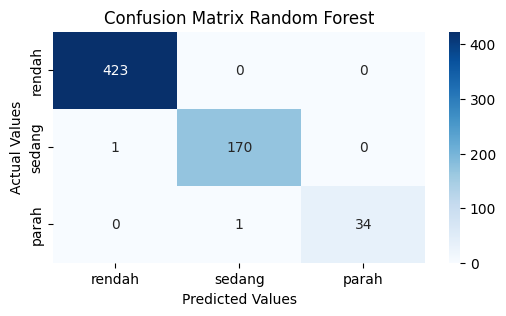

In [84]:
compare_cls(X_train, X_test, y_train, y_test, topik="ekonomi")

## Kecelakaan

### Preprocess

In [85]:
# Kecelakaan Section (Topic id = 3)
cls_old_kecelakaan = cls_old[cls_old['berita_topik_id'] == 3]
cls_old_kecelakaan = cls_old_kecelakaan[['sev_death', 'sev_injury', 'sev_lost', 'sev_sink', 'sev_plane']]
print(len(cls_old_kecelakaan))
cls_old_kecelakaan.rename(columns = {'sev_death':'mati', 'sev_injury':'luka', 'sev_lost':'hilang', 'sev_sink':'tenggelam', 'sev_plane':'pesawat'}, inplace=True)
cls_old_kecelakaan.dtypes

2102


mati         float64
luka         float64
hilang       float64
tenggelam    float64
pesawat      float64
dtype: object

In [86]:
cls_old_kecelakaan['mati'] = cls_old_kecelakaan['mati'].astype(int)
cls_old_kecelakaan['luka'] = cls_old_kecelakaan['luka'].astype(int)
cls_old_kecelakaan['hilang'] = cls_old_kecelakaan['hilang'].astype(int)
cls_old_kecelakaan['tenggelam'] = cls_old_kecelakaan['tenggelam'].astype(int)
cls_old_kecelakaan['pesawat'] = cls_old_kecelakaan['pesawat'].astype(int)

cls_old_kecelakaan.head()

,mati,luka,hilang,tenggelam,pesawat
4333,7,1,0,0,0
4334,5,12,1,0,0
4335,1,1,0,0,0
4336,3,0,1,0,0
4337,0,5,0,0,0


### Input Severity

In [87]:
def calc_kec(df):
    keparahanValues = []
    for i in range (0,len(df)):
        mati=df.iloc[i,0]
        luka=df.iloc[i,1]
        hilang=df.iloc[i,2]
        tenggelam=df.iloc[i,3]
        pesawat=df.iloc[i,4]

        keparahan = 1

        if mati>0 or luka>=6 or hilang>=4 or tenggelam>=4:
            keparahan = 2
        
        if mati>3 or luka>10 or hilang>10 or tenggelam>10 or pesawat != 0:
            keparahan = 3

        keparahanValues.append(keparahan)
    return keparahanValues

In [88]:
cls_old_kecelakaan['keparahannew']=calc_kec(cls_old_kecelakaan)
cls_old_kecelakaan.head()

,mati,luka,hilang,tenggelam,pesawat,keparahannew
4333,7,1,0,0,0,3
4334,5,12,1,0,0,3
4335,1,1,0,0,0,2
4336,3,0,1,0,0,2
4337,0,5,0,0,0,1


### Fit & Train

In [89]:
X = cls_old_kecelakaan.drop(['keparahannew'], axis=1)
y = cls_old_kecelakaan['keparahannew']

In [90]:
# Split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(len(X_train))
print(len(X_test))
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

1681
421
(1681, 5) (421, 5) (1681,) (421,)


Model accuracy score
Naive Bayes : 0.4584
Random Forest : 0.9976
Logistic Regression : 0.9881
Decision Tree : 0.9976
SVM : 0.4917
KNearestNeighbors : 0.9952
Deep Learning (MLP) : 0.4941

Average cross-validation score
Naive Bayes: 0.5069
Random Forest: 0.9982
Logistic Regression: 0.9869
Decision Tree: 0.9976
SVM: 0.4985
KNearestNeighbors: 0.9893
Deep Learning (MLP): 0.4961

f1 score
Naive Bayes: 0.2933
Random Forest: 0.9976
Logistic Regression: 0.9882
Decision Tree: 0.9976
SVM: 0.3494
KNearestNeighbors: 0.9952
Deep Learning (MLP): 0.3871

              precision    recall  f1-score   support

      rendah       1.00      1.00      1.00       176
      sedang       0.99      1.00      1.00       191
       parah       1.00      0.98      0.99        54

    accuracy                           1.00       421
   macro avg       1.00      0.99      1.00       421
weighted avg       1.00      1.00      1.00       421

       mati  luka  hilang  tenggelam  pesawat  nb  rf  lr  dt  svm  knn  m

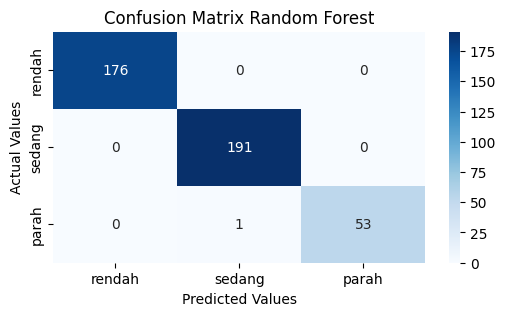

In [91]:
compare_cls(X_train, X_test, y_train, y_test, topik="kecelakaan")

## Kesehatan

### Preprocess

In [92]:
# Kesehatan Section (Topic id = 4)
cls_old_kesehatan = cls_old[cls_old['berita_topik_id'] == 4]
cls_old_kesehatan = cls_old_kesehatan[['sev_death', 'sev_injury']]
print(len(cls_old_kesehatan))
cls_old_kesehatan.rename(columns = {'sev_death':'mati', 'sev_injury':'luka'}, inplace=True)
cls_old_kesehatan.dtypes

1309


mati    float64
luka    float64
dtype: object

In [93]:
cls_old_kesehatan['mati'] = cls_old_kesehatan['mati'].astype(int)
cls_old_kesehatan['luka'] = cls_old_kesehatan['luka'].astype(int)

cls_old_kesehatan.head()

,mati,luka
5250,0,1
5251,0,0
5252,0,0
5253,0,1
5254,0,1


### Input Severity

In [94]:
def calc_kes(df):
    keparahanValues = []
    for i in range (0,len(df)):
        mati=df.iloc[i,0]
        luka=df.iloc[i,1]

        keparahan = 1

        if mati>=4 or luka>=11:
            keparahan = 2
        
        if mati>10 or luka>25:
            keparahan = 3

        keparahanValues.append(keparahan)
    return keparahanValues

In [95]:
cls_old_kesehatan['keparahannew']=calc_kes(cls_old_kesehatan)
cls_old_kesehatan.head()

,mati,luka,keparahannew
5250,0,1,1
5251,0,0,1
5252,0,0,1
5253,0,1,1
5254,0,1,1


### Fit & Train

In [96]:
X = cls_old_kesehatan.drop(['keparahannew'], axis=1)
y = cls_old_kesehatan['keparahannew']

In [97]:
# Split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(len(X_train))
print(len(X_test))
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

1047
262
(1047, 2) (262, 2) (1047,) (262,)


Model accuracy score
Naive Bayes : 0.0496
Random Forest : 1.0000
Logistic Regression : 0.9847
Decision Tree : 1.0000
SVM : 0.9046
KNearestNeighbors : 0.9962
Deep Learning (MLP) : 0.9542

Average cross-validation score
Naive Bayes: 0.1209
Random Forest: 0.9952
Logistic Regression: 0.9952
Decision Tree: 0.9971
SVM: 0.8997
KNearestNeighbors: 0.9952
Deep Learning (MLP): 0.9369

f1 score
Naive Bayes: 0.0313
Random Forest: 1.0000
Logistic Regression: 0.9827
Decision Tree: 1.0000
SVM: 0.8593
KNearestNeighbors: 0.9961
Deep Learning (MLP): 0.9385

              precision    recall  f1-score   support

      rendah       1.00      1.00      1.00       237
      sedang       1.00      1.00      1.00         8
       parah       1.00      1.00      1.00        17

    accuracy                           1.00       262
   macro avg       1.00      1.00      1.00       262
weighted avg       1.00      1.00      1.00       262

      mati  luka  nb  rf  lr  dt  svm  knn  mlp  actual
6389     0     1  

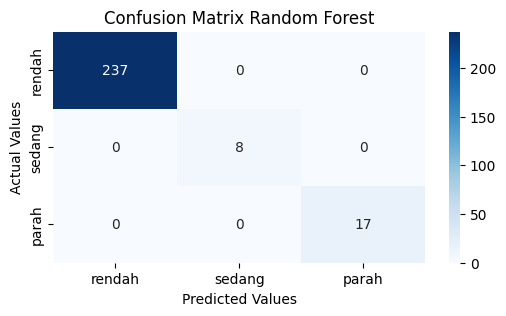

In [98]:
compare_cls(X_train, X_test, y_train, y_test, topik="kesehatan")

## Kriminalitas

### Preprocess

In [99]:
# Kriminalitas Section (Topic id = 5)
cls_old_kriminalitas = cls_old[cls_old['berita_topik_id'] == 5]
cls_old_kriminalitas = cls_old_kriminalitas[['sev_death', 'sev_injury', 'sev_lost_items', 'sev_lost_money', 'sev_rape']]
print(len(cls_old_kriminalitas))
cls_old_kriminalitas.rename(columns = {'sev_death':'mati', 'sev_injury':'luka', 'sev_lost_items':'kerugianbarang', 'sev_lost_money':'kerugianuang', 'sev_rape':'pemerkosaan'}, inplace=True)
cls_old_kriminalitas.dtypes

2479


mati              float64
luka              float64
kerugianbarang    float64
kerugianuang      float64
pemerkosaan       float64
dtype: object

In [100]:
cls_old_kriminalitas['mati'] = cls_old_kriminalitas['mati'].astype(int)
cls_old_kriminalitas['luka'] = cls_old_kriminalitas['luka'].astype(int)
cls_old_kriminalitas['kerugianbarang'] = cls_old_kriminalitas['kerugianbarang'].astype(int)
cls_old_kriminalitas['kerugianuang'] = cls_old_kriminalitas['kerugianuang'].astype(int)
cls_old_kriminalitas['pemerkosaan'] = cls_old_kriminalitas['pemerkosaan'].astype(int)

cls_old_kriminalitas.head()

,mati,luka,kerugianbarang,kerugianuang,pemerkosaan
6469,0,0,1,400000000,0
6470,0,0,1,0,0
6471,0,1,1,400000000,0
6472,0,1,400000000,400000000,0
6473,0,1,1,1,0


### Input Severity

In [101]:
def calc_kri(df):
    keparahanValues = []
    for i in range (0,len(df)):
        mati=df.iloc[i,0]
        luka=df.iloc[i,1]
        kerugianbarang=df.iloc[i,2]
        kerugianuang=df.iloc[i,3]
        pemerkosaan=df.iloc[i,4]

        keparahan = 1

        if luka>=2 or kerugianbarang>=3 or kerugianuang>5000000:
            keparahan = 2

        if (kerugianbarang==1 and luka==1) or (kerugianuang>0 and luka==1) or (kerugianuang>0 and kerugianbarang==1):
            keparahan = 2
            
        if mati>0 or luka>3 or kerugianbarang>4 or kerugianuang>10000000 or pemerkosaan>0 or (luka>0 and kerugianbarang>0) \
        or (luka>0 and kerugianuang>0) or (kerugianuang>0 and kerugianbarang>0):
            keparahan = 3

            
        if luka>0 and kerugianbarang>0 and kerugianuang>0:
            keparahan = 3

        keparahanValues.append(keparahan)
    return keparahanValues

In [102]:
cls_old_kriminalitas['keparahannew']=calc_kri(cls_old_kriminalitas)
cls_old_kriminalitas.head()

,mati,luka,kerugianbarang,kerugianuang,pemerkosaan,keparahannew
6469,0,0,1,400000000,0,3
6470,0,0,1,0,0,1
6471,0,1,1,400000000,0,3
6472,0,1,400000000,400000000,0,3
6473,0,1,1,1,0,3


### Fit & Train

In [103]:
X = cls_old_kriminalitas.drop(['keparahannew'], axis=1)
y = cls_old_kriminalitas['keparahannew']

In [104]:
# Split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(len(X_train))
print(len(X_test))
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

1983
496
(1983, 5) (496, 5) (1983,) (496,)


Model accuracy score
Naive Bayes : 0.0081
Random Forest : 1.0000
Logistic Regression : 0.9496
Decision Tree : 1.0000
SVM : 0.8226
KNearestNeighbors : 0.9899
Deep Learning (MLP) : 0.8206

Average cross-validation score
Naive Bayes: 0.0197
Random Forest: 0.9990
Logistic Regression: 0.9576
Decision Tree: 0.9990
SVM: 0.8275
KNearestNeighbors: 0.9879
Deep Learning (MLP): 0.8275

f1 score
Naive Bayes: 0.0098
Random Forest: 1.0000
Logistic Regression: 0.9549
Decision Tree: 1.0000
SVM: 0.7425
KNearestNeighbors: 0.9909
Deep Learning (MLP): 0.7488

              precision    recall  f1-score   support

      rendah       1.00      1.00      1.00        87
      sedang       1.00      1.00      1.00         1
       parah       1.00      1.00      1.00       408

    accuracy                           1.00       496
   macro avg       1.00      1.00      1.00       496
weighted avg       1.00      1.00      1.00       496

       mati  luka  kerugianbarang  kerugianuang  pemerkosaan  nb  rf  lr  

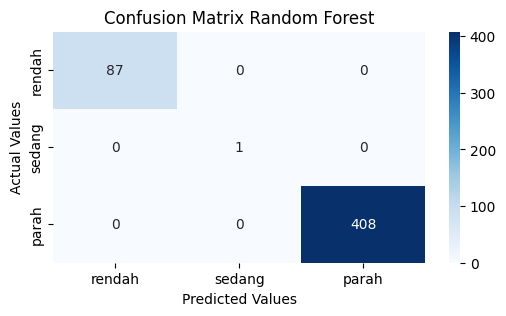

In [105]:
compare_cls(X_train, X_test, y_train, y_test, topik="kriminalitas")

## Olahraga

### Preprocess

In [106]:
# Kriminalitas Section (Topic id = 6)
cls_old_olahraga = cls_old[cls_old['berita_topik_id'] == 6]
cls_old_olahraga = cls_old_olahraga[['ID', 'berita_desc','sev_internasional', 'sev_nasional', 'sev_provkota', 'class_classification']]
print(len(cls_old_olahraga))
cls_old_olahraga.rename(columns = {'berita_desc':'berita', 'sev_internasional':'internasional', 'sev_nasional':'nasional', 'sev_provkota':'provkota', 'class_classification':'cls'}, inplace=True)
cls_old_olahraga.dtypes

489


ID                 int64
berita            object
internasional    float64
nasional         float64
provkota         float64
cls               object
dtype: object

In [107]:
internasional_indeks = ['motogp', 'asian games', 'aff', 'olimpiade',
                        'piala asia', 'bwf', 'nba', 'sea games', 'indonesia open', 'indonesia masters']
nasional_indeks = ['pon', 'piala presiden', 'liga 2', 'liga 1', 'liga 3', 'ibl', 'proliga',
                    'liga mahasiswa', 'liga mahasiswa', 'turnamen pramusim', 'pp pbsi', 'dbl', 'fiba']
provkota_indeks = ['airlangga challenge', 'tiga pilar']
kejuaraans = [internasional_indeks] + [nasional_indeks] + [provkota_indeks]

num_inter = []
num_nas = []
num_prov = []

for i in range(len(cls_old_olahraga)):
    s = cls_old_olahraga['berita'].iloc[i]
    s = s.replace('\n', ' ')
    s = s.replace('\r', ' ')
    s = re.sub("\(.*?\)", "", s)
    # s = s.lower()
    tokens = word_tokenize(s)
    word = (' ').join(tokens)

    inte = 0
    nasional = 0
    prov = 0

    for n in range(0, len(kejuaraans)):
        for co in range(0, len(kejuaraans[n])):
            if n == 0:
                jumlah = word.count(internasional_indeks[co])
                inte = inte + jumlah
            if n == 1:
                jumlah = word.count(nasional_indeks[co])
                nasional = nasional + jumlah
            if n == 2:
                jumlah = word.count(provkota_indeks[co])
                prov = prov + jumlah
    num_inter.append(inte)
    num_nas.append(nasional)
    num_prov.append(prov)

cls_old_olahraga['n_internasional'] = pd.Series(num_inter).values
cls_old_olahraga['n_nasional'] = pd.Series(num_nas).values
cls_old_olahraga['n_provkota'] = pd.Series(num_prov).values

cls_old_olahraga['internasional'] = cls_old_olahraga['internasional'].astype(int)
cls_old_olahraga['nasional'] = cls_old_olahraga['nasional'].astype(int)
cls_old_olahraga['provkota'] = cls_old_olahraga['provkota'].astype(int)
# cls_old_olahraga['cls'] = cls_old_olahraga['cls'].astype(int)

cls_old_olahraga.head()

,ID,berita,internasional,nasional,provkota,cls,n_internasional,n_nasional,n_provkota
8660,9105,_KlubDewa United Basketball Resmi Pindah Kanda...,0,0,0,provkota,0,0,0
8661,9106,Simak jadwal lengkap perhelatan BWF World Tour...,0,0,0,provkota,0,0,0
8662,9107,Berikut jadwal badminton 2023 yang dirilis ole...,0,0,0,provkota,0,0,0
8663,9108,Fajar Alfian/Muhammad Rian Ardianto lolos ke b...,0,0,0,provkota,0,0,0
8664,9109,\- Indonesian Basketball League (IBL) 2023 aka...,0,0,0,provkota,0,0,0


### Input Severity

In [108]:
# sanity check
# cls_old_olahraga[cls_old_olahraga['internasional'] != cls_old_olahraga['n_internasional']]
# cls_old_olahraga[cls_old_olahraga['nasional'] != cls_old_olahraga['n_nasional']]
# cls_old_olahraga[cls_old_olahraga['provkota'] != cls_old_olahraga['n_provkota']]
# cls_old_olahraga[['provkota', 'nasional', 'internasional', 'cls']].value_counts()
# cls_old_olahraga[cls_old_olahraga['nasional'] == 36]

### Fit & Train

In [109]:
X = cls_old_olahraga.drop(['cls', 'nasional', 'internasional', 'provkota', 'ID', 'berita'], axis=1)
y = cls_old_olahraga['cls']

In [110]:
# Split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(len(X_train))
print(len(X_test))
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

391
98
(391, 3) (98, 3) (391,) (98,)


Model accuracy score
Naive Bayes : 0.9796
Random Forest : 1.0000
Logistic Regression : 1.0000
Decision Tree : 1.0000
SVM : 1.0000
KNearestNeighbors : 1.0000
Deep Learning (MLP) : 1.0000

Average cross-validation score
Naive Bayes: 0.9847
Random Forest: 0.9974
Logistic Regression: 0.9873
Decision Tree: 0.9974
SVM: 0.9923
KNearestNeighbors: 0.9974
Deep Learning (MLP): 0.9949

f1 score
Naive Bayes: 0.9842
Random Forest: 1.0000
Logistic Regression: 1.0000
Decision Tree: 1.0000
SVM: 1.0000
KNearestNeighbors: 1.0000
Deep Learning (MLP): 1.0000

              precision    recall  f1-score   support

      rendah       1.00      1.00      1.00         1
      sedang       1.00      1.00      1.00        21
       parah       1.00      1.00      1.00        76

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

       n_internasional  n_nasional  n_provkota        nb        rf        

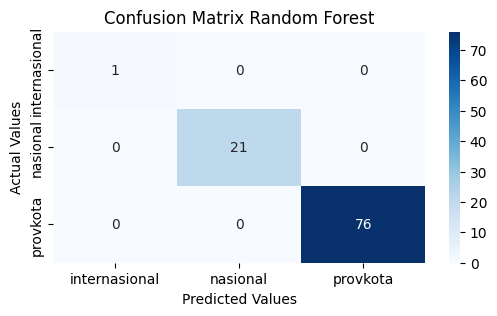

In [111]:
compare_cls(X_train, X_test, y_train, y_test, mode='olahraga', topik="olahraga")

In [112]:
df = pd.read_csv(result_path)
df.to_excel(result_path[:-4] + ".xlsx")